In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from random import sample
import re

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#for adding heavy chain
complementator = str.maketrans("ACGT", "TGCA") 

In [4]:
def get_norm_mutspec_aj(df):
    
    normMut = pd.DataFrame()
    
    normMut[['A>C','A>G','A>T']] = df[['A>C','A>G','A>T']].div(df['A'], axis=0)
    normMut[['C>A','C>G','C>T']] = df[['C>A','C>G','C>T']].div(df['C'], axis=0)
    normMut[['G>A', 'G>C', 'G>T']] = df[['G>A', 'G>C', 'G>T']].div(df['G'], axis=0)
    normMut[['T>A', 'T>C', 'T>G']] = df[['T>A', 'T>C', 'T>G']].div(df['T'], axis=0)
    
    normMut = normMut.fillna(0)
    normMut = normMut.div(normMut.sum(axis=1), axis=0) #normalizing (aj)
    
    # normMut.columns = normMut.columns.str.translate(complementator)
    
    return normMut

In [5]:
def get_norm_mutspec_waj(df):
    
    normMut = pd.DataFrame()
    
    normMut[['A>C','A>G','A>T']] = df[['A>C','A>G','A>T']].div(df['A'], axis=0)
    normMut[['C>A','C>G','C>T']] = df[['C>A','C>G','C>T']].div(df['C'], axis=0)
    normMut[['G>A', 'G>C', 'G>T']] = df[['G>A', 'G>C', 'G>T']].div(df['G'], axis=0)
    normMut[['T>A', 'T>C', 'T>G']] = df[['T>A', 'T>C', 'T>G']].div(df['T'], axis=0)
    
    normMut = normMut.fillna(0)
    # normMut = normMut.div(normMut.sum(axis=1), axis=0) #normalizing (waj)
    
    # normMut.columns = normMut.columns.str.translate(complementator)
    
    return normMut

In [6]:
def add_col_to_norm_mutspec(normMut:pd.DataFrame, df:pd.DataFrame):
    normMut.insert(0, 'G4_id', df['G4_id'])
    normMut.insert(1, 'side', df['side'])
    normMut = normMut.fillna(0)
    return normMut

## Gtex analysis

In [47]:
df_loops_gtex = pd.read_csv('../data/processed/df_loops_gtex_pqs.csv')
df_15_col_gtex = pd.read_csv('../data/processed/df_15_col_gtex_pqs.csv')
df_tetrads_gtex = pd.read_csv('../data/processed/df_tetrads_gtex_pqs.csv')

In [48]:
df_category_gtex = pd.read_csv('../data/processed/df_category_gtex_pqs.csv')

In [49]:
df_loops_gtex['n_mut/length'] = df_loops_gtex['number_of_Mut']/df_loops_gtex['sequence'].apply(lambda x:len(x))
df_15_col_gtex['n_mut/length'] = df_15_col_gtex['number_of_Mut']/15
df_tetrads_gtex['n_mut/length'] = df_tetrads_gtex['number_of_Mut']/df_tetrads_gtex['sequence'].apply(lambda x:len(x))

In [50]:
df_gtex_concat_loops = pd.concat([df_loops_gtex, df_15_col_gtex]) 
df_gtex_concat_tetrads = pd.concat([df_tetrads_gtex, df_15_col_gtex]) 

C:\Users\777\AppData\Local\Temp\ipykernel_23052\3370446601.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


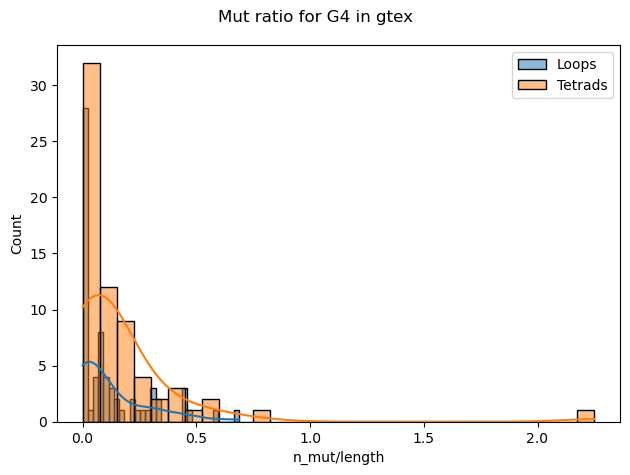

In [12]:
fig, axs = plt.subplots()
sns.histplot(df_loops_gtex['n_mut/length'], bins=30, kde=True, label='Loops')
sns.histplot(df_tetrads_gtex['n_mut/length'],bins=30, kde=True, label='Tetrads')
plt.suptitle('Mut ratio for G4 in gtex')
plt.legend()
plt.tight_layout()
fig.show()

In [17]:
muts_in_tetrads = df_category_gtex[((df_category_gtex['category'] == 'Tetrad') | \
                                           (df_category_gtex['category'] == 'Mismatch')) & \
                                      (df_category_gtex['number_of_Mut'] > 0)]\
    .melt(['G4_id', 'pos_in_seq', 'pos_in_ref'], 
          ['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T', 'T>A', 'T>C', 'T>G'], 'sbs', 'count')

muts_in_tetrads = muts_in_tetrads[muts_in_tetrads['count'] > 0]

In [18]:
muts_in_tetrads.groupby('sbs')['count'].sum().sort_values(ascending=False)

sbs
A>G    56.0
C>T    46.0
G>A    22.0
T>C    16.0
C>A     6.0
A>T     4.0
G>C     2.0
G>T     2.0
A>C     1.0
C>G     1.0
Name: count, dtype: float64

[Text(0.5, 1.0, 'Number of mutation in G4 tetrads'),
 Text(0.5, 0, 'Mutations'),
 Text(0, 0.5, 'Tetrads')]

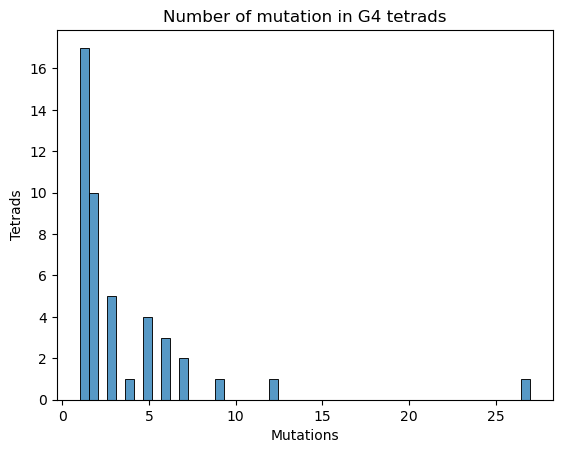

In [19]:
sns.histplot(muts_in_tetrads.groupby('G4_id')['count'].sum(), bins=50) \
            .set(title='Number of mutation in G4 tetrads', xlabel='Mutations', ylabel='Tetrads')

In [20]:
muts_in_tetrads.groupby('G4_id')['count'].sum().sort_values(ascending=False)[:10]

G4_id
66    27.0
2     12.0
4      9.0
65     7.0
59     7.0
67     6.0
9      6.0
50     6.0
3      5.0
15     5.0
Name: count, dtype: float64

In [21]:
g4_rm = [2, 66]

C:\Users\777\AppData\Local\Temp\ipykernel_23052\3471963889.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


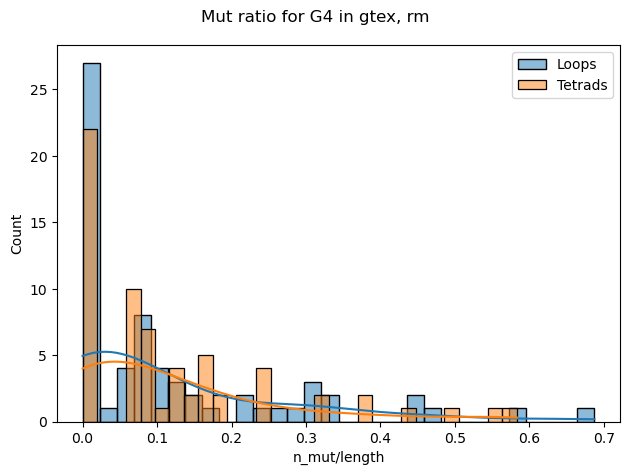

In [22]:
fig, axs = plt.subplots()
sns.histplot(df_loops_gtex[~df_loops_gtex['G4_id'].isin(g4_rm)]['n_mut/length'], bins=30, kde=True, label='Loops')
sns.histplot(df_tetrads_gtex[~df_tetrads_gtex['G4_id'].isin(g4_rm)]['n_mut/length'],bins=30, kde=True, label='Tetrads')
plt.suptitle('Mut ratio for G4 in gtex, rm')
plt.legend()
plt.tight_layout()
fig.show()

In [12]:
colors = ['royalblue', 'darkorange', 'tomato', 'orchid'] 
order_l = ['45_up', '30_up', '15_up', 'loops', '15_down', '30_down', '45_down']
order_t = ['45_up', '30_up', '15_up', 'tetrads', '15_down', '30_down', '45_down']

[Text(0.5, 1.0, 'Mut ratio, mut/site, gtex'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

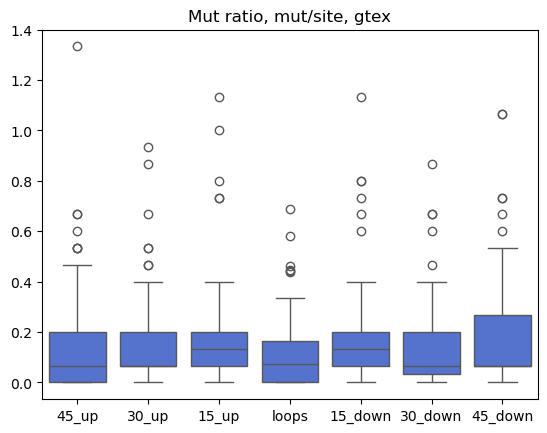

In [25]:
# Number of Mut / interval length = mut ratio
sns.boxplot(data=df_gtex_concat_loops, 
                 x='side', y='n_mut/length', 
              color=colors[0], order=order_l) \
        .set(title='Mut ratio, mut/site, gtex', xlabel=None, ylabel=None)

[Text(0.5, 1.0, 'Mut ratio, mut/site, gtex'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

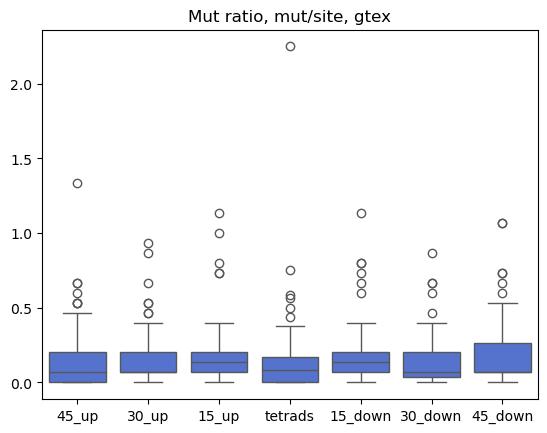

In [19]:
sns.boxplot(data=df_gtex_concat_tetrads, 
                 x='side', y='n_mut/length', 
              color=colors[0], order=order_t) \
        .set(title='Mut ratio, mut/site, gtex', xlabel=None, ylabel=None)

## gnom AF_hom

In [51]:
df_loops_gnom = pd.read_csv('../data/processed/df_loops_gnom_pqs.csv')
df_15_col_gnom = pd.read_csv('../data/processed/df_15_col_gnom_pqs.csv')
df_tetrads_gnom = pd.read_csv('../data/processed/df_tetrads_gnom_pqs.csv')
df_category_gnom = pd.read_csv('../data/processed/df_category_gnom_pqs.csv')

In [52]:
df_loops_gnom['n_mut/length'] = df_loops_gnom['number_of_Mut']/df_loops_gnom['sequence'].apply(lambda x:len(x))
df_15_col_gnom['n_mut/length'] = df_15_col_gnom['number_of_Mut']/15
df_tetrads_gnom['n_mut/length'] = df_tetrads_gnom['number_of_Mut']/df_tetrads_gnom['sequence'].apply(lambda x:len(x))

In [53]:
df_gnom_concat_loops = pd.concat([df_loops_gnom, df_15_col_gnom]) 
df_gnom_concat_tetrads = pd.concat([df_tetrads_gnom, df_15_col_gnom]) 

C:\Users\777\AppData\Local\Temp\ipykernel_14704\3999811319.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


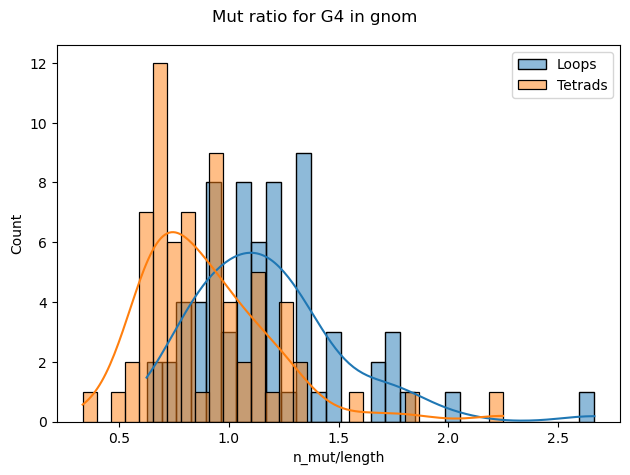

In [8]:
fig, axs = plt.subplots()
sns.histplot(df_loops_gnom['n_mut/length'], bins=30, kde=True, label='Loops')
sns.histplot(df_tetrads_gnom['n_mut/length'],bins=30, kde=True, label='Tetrads')
plt.suptitle('Mut ratio for G4 in gnom')
plt.legend()
plt.tight_layout()
fig.show()

#### GNOM AF_hom

In [7]:
df_loops_gnom_af_hom = pd.read_csv('../data/processed/df_loops_gnom_af_hom_pqs.csv')
df_15_col_gnom_af_hom = pd.read_csv('../data/processed/df_15_col_gnom_af_hom_pqs.csv')
df_tetrads_gnom_af_hom = pd.read_csv('../data/processed/df_tetrads_gnom_af_hom_pqs.csv')
df_category_gnom_af_hom = pd.read_csv('../data/processed/df_category_gnom_af_hom_pqs.csv')

In [8]:
df_loops_gnom_af_hom['n_mut/length'] = df_loops_gnom_af_hom['number_of_Mut']/df_loops_gnom_af_hom['sequence'].apply(lambda x:len(x))
df_15_col_gnom_af_hom['n_mut/length'] = df_15_col_gnom_af_hom['number_of_Mut']/15
df_tetrads_gnom_af_hom['n_mut/length'] = df_tetrads_gnom_af_hom['number_of_Mut']/df_tetrads_gnom_af_hom['sequence'].apply(lambda x:len(x))

C:\Users\777\AppData\Local\Temp\ipykernel_17028\1543419182.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


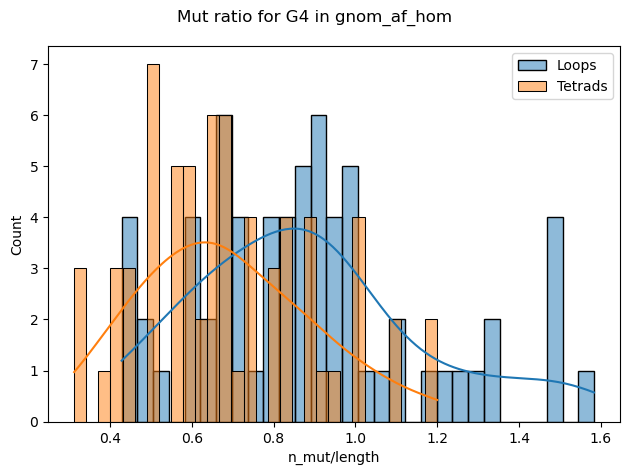

In [9]:
fig, axs = plt.subplots()
sns.histplot(df_loops_gnom_af_hom['n_mut/length'], bins=30, kde=True, label='Loops')
sns.histplot(df_tetrads_gnom_af_hom['n_mut/length'],bins=30, kde=True, label='Tetrads')
plt.suptitle('Mut ratio for G4 in gnom_af_hom')
plt.legend()
plt.tight_layout()
fig.show()

### Mut ratio and MutSpec gnom

[Text(0.5, 1.0, 'Mut ratio, mut/site, gnom'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

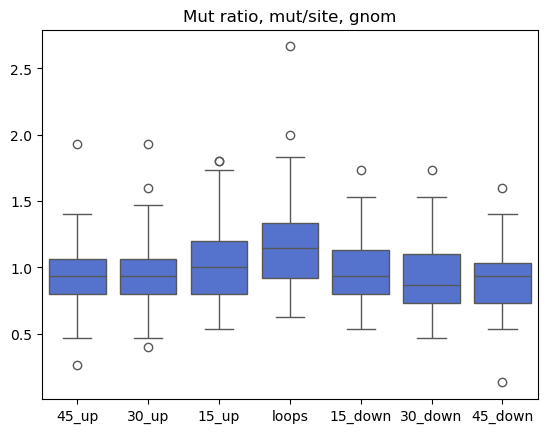

In [58]:
sns.boxplot(data=df_gnom_concat_loops, 
                 x='side', y='n_mut/length', 
              color=colors[0], order=order_l) \
        .set(title='Mut ratio, mut/site, gnom', xlabel=None, ylabel=None)

[Text(0.5, 1.0, 'Mut ratio, mut/site, gnom'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

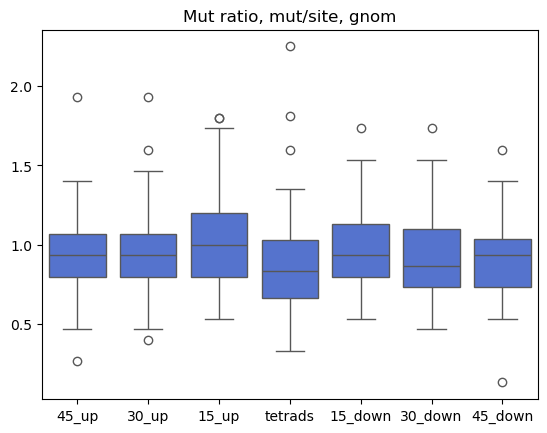

In [20]:
sns.boxplot(data=df_gnom_concat_tetrads, 
                 x='side', y='n_mut/length', 
              color=colors[0], order=order_t) \
        .set(title='Mut ratio, mut/site, gnom', xlabel=None, ylabel=None)

In [60]:
print('Loop|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length'], 
                        df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)
print('-15|Loops', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == '15_up']['n_mut/length'], 
                         df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length']).pvalue)
print('15|Loops', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == '15_down']['n_mut/length'], 
                         df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length']).pvalue)
print('-30|Loops', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == '30_up']['n_mut/length'], 
                         df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length']).pvalue)
print('30|Loops', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == '30_down']['n_mut/length'], 
                         df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length']).pvalue)
print('-45|Loops', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == '45_up']['n_mut/length'], 
                         df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length']).pvalue)
print('45|Loops', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == '45_down']['n_mut/length'], 
                         df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length']).pvalue)

Loop|Tetrads pval = 1.665905480294184e-07
-15|Loops pval = 0.001307559242187811
15|Loops pval = 0.0012185196903144577
-30|Loops pval = 2.572797329108254e-05
30|Loops pval = 3.610659445527585e-05
-45|Loops pval = 0.0006817710854368766
45|Loops pval = 2.2684223596951537e-06


In [59]:
print('Loop|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_loops[df_gnom_concat_loops['side'] == 'loops']['n_mut/length'], 
                        df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)
print('-15|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == '15_up']['n_mut/length'], 
                         df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)
print('15|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == '15_down']['n_mut/length'], 
                         df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)
print('-30|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == '30_up']['n_mut/length'], 
                         df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)
print('30|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == '30_down']['n_mut/length'], 
                         df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)
print('-45|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == '45_up']['n_mut/length'], 
                         df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)
print('45|Tetrads', 'pval =', 
      stats.mannwhitneyu(df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == '45_down']['n_mut/length'], 
                         df_gnom_concat_tetrads[df_gnom_concat_tetrads['side'] == 'tetrads']['n_mut/length']).pvalue)

Loop|Tetrads pval = 1.665905480294184e-07
-15|Tetrads pval = 0.011891597836441076
15|Tetrads pval = 0.015457125035813125
-30|Tetrads pval = 0.25013719391149203
30|Tetrads pval = 0.2343027516811088
-45|Tetrads pval = 0.03932785985641236
45|Tetrads pval = 0.4535171312293016


#### Gnom_norm

In [25]:
norm_15_col_gnom_aj = add_col_to_norm_mutspec(get_norm_mutspec_aj(df_15_col_gnom).fillna(0), df_15_col_gnom)
norm_loops_gnom_aj = add_col_to_norm_mutspec(get_norm_mutspec_aj(df_loops_gnom).fillna(0), df_loops_gnom)
norm_tetrads_gnom_aj = add_col_to_norm_mutspec(get_norm_mutspec_aj(df_tetrads_gnom).fillna(0), df_tetrads_gnom)

In [26]:
norm_15_col_gnom_waj = add_col_to_norm_mutspec(get_norm_mutspec_waj(df_15_col_gnom).fillna(0), df_15_col_gnom)
norm_loops_gnom_waj = add_col_to_norm_mutspec(get_norm_mutspec_waj(df_loops_gnom).fillna(0), df_loops_gnom)
norm_tetrads_gnom_waj = add_col_to_norm_mutspec(get_norm_mutspec_waj(df_tetrads_gnom).fillna(0), df_tetrads_gnom)

In [27]:
norm_15_col_gnom_aj['location'] = norm_15_col_gnom_aj['side'].str.replace('15_up', '-15').replace('15_down', '15') \
                            .replace('30_up', '-30').replace('30_down', '30') \
                            .replace('45_up', '-45').replace('45_down', '45')
norm_loops_gnom_aj['location'] = 0
norm_tetrads_gnom_aj['location'] = 0

norm_15_col_gnom_waj['location'] = norm_15_col_gnom_waj['side'].str.replace('15_up', '-15').replace('15_down', '15') \
                            .replace('30_up', '-30').replace('30_down', '30') \
                            .replace('45_up', '-45').replace('45_down', '45')
norm_loops_gnom_waj['location'] = 0
norm_tetrads_gnom_waj['location'] = 0

In [28]:
norm_gnom_merged_loops_aj = pd.concat([norm_15_col_gnom_aj,norm_loops_gnom_aj])
norm_gnom_merged_tetrads_aj = pd.concat([norm_15_col_gnom_aj,norm_tetrads_gnom_aj])

norm_gnom_merged_loops_waj = pd.concat([norm_15_col_gnom_waj,norm_loops_gnom_waj])
norm_gnom_merged_tetrads_waj = pd.concat([norm_15_col_gnom_waj,norm_tetrads_gnom_waj])

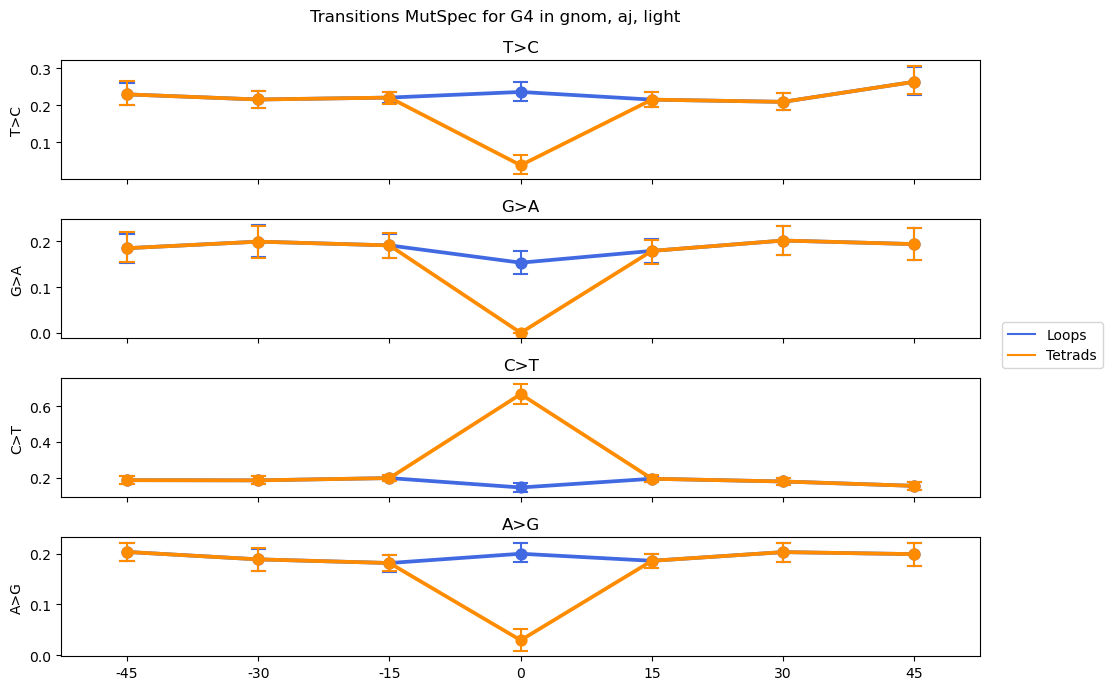

In [29]:
fig, axs = plt.subplots(4, sharex=True,  figsize=(10, 7))
mutations = ['T>C', 'G>A', 'C>T', 'A>G']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
order = [-45, -30, -15, 0, 15, 30, 45]

for i, mutation in enumerate(mutations):
    row = i % 4
    sns.pointplot(data=norm_gnom_merged_loops_aj, 
                 x='location', y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)
    sns.pointplot(data=norm_gnom_merged_tetrads_aj, 
                 x='location', y=mutation, ax=axs[row], color=colors[1], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)

# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[1])]
labels = ['Loops', 'Tetrads']

# Add legend with custom handles and labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# axs[0].set_xticklabels(['N upstream', 'G4', 'N downstream'])
plt.suptitle('Transitions MutSpec for G4 in gnom, aj, light')
plt.tight_layout()
plt.show()

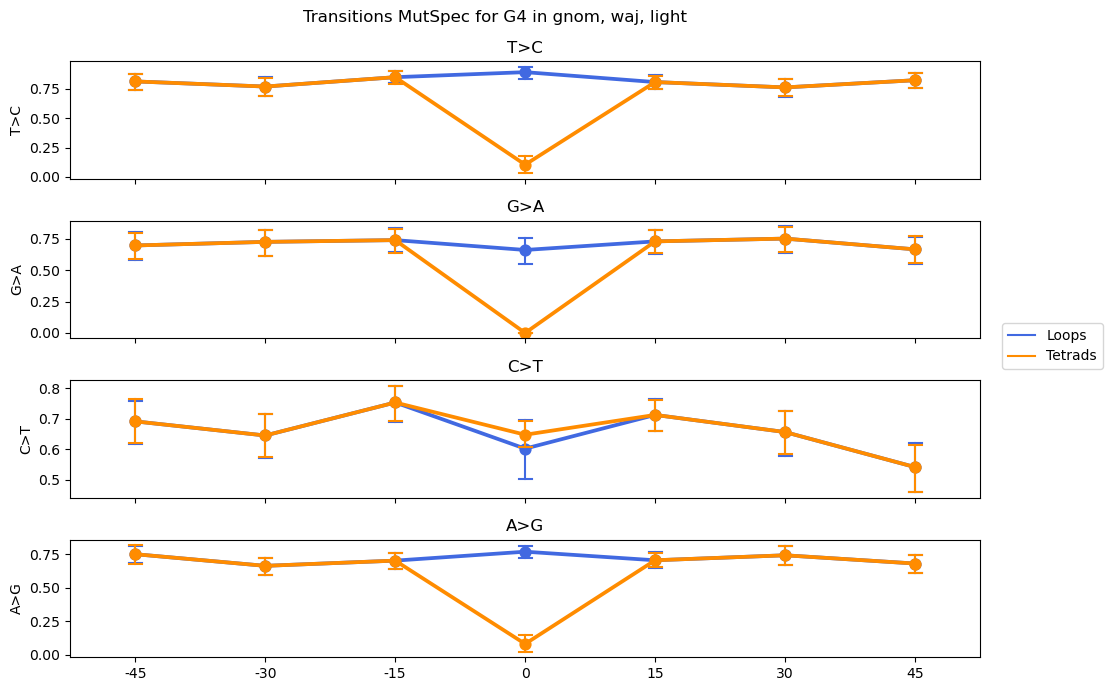

In [30]:
fig, axs = plt.subplots(4, sharex=True,  figsize=(10, 7))
mutations = ['T>C', 'G>A', 'C>T', 'A>G']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
order = [-45, -30, -15, 0, 15, 30, 45]

for i, mutation in enumerate(mutations):
    row = i % 4
    sns.pointplot(data=norm_gnom_merged_loops_waj, 
                 x='location', y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)
    sns.pointplot(data=norm_gnom_merged_tetrads_waj, 
                 x='location', y=mutation, ax=axs[row], color=colors[1], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)

# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[1])]
labels = ['Loops', 'Tetrads']

# Add legend with custom handles and labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# axs[0].set_xticklabels(['N upstream', 'G4', 'N downstream'])
plt.suptitle('Transitions MutSpec for G4 in gnom, waj, light')
plt.tight_layout()
plt.show()

In [62]:
print('C>T Loop|Tetrads', 'pval =', 
      stats.mannwhitneyu(norm_gnom_merged_loops_waj[(norm_gnom_merged_loops_waj['side'] == 'loops')]['C>T'], 
                        norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == 'tetrads')]['C>T']).pvalue)
print('C>T -15|Tetrads', 'pval =', 
      stats.mannwhitneyu(norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == '15_up')]['C>T'], 
                         norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == 'tetrads')]['C>T']).pvalue)
print('C>T 15|Tetrads', 'pval =', 
      stats.mannwhitneyu(norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == '15_down')]['C>T'], 
                         norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == 'tetrads')]['C>T']).pvalue)
print('C>T -30|Tetrads', 'pval =', 
      stats.mannwhitneyu(norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == '30_up')]['C>T'], 
                         norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == 'tetrads')]['C>T']).pvalue)
print('C>T 30|Tetrads', 'pval =', 
      stats.mannwhitneyu(norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == '30_down')]['C>T'], 
                         norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == 'tetrads')]['C>T']).pvalue)
print('C>T -45|Tetrads', 'pval =', 
      stats.mannwhitneyu(norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == '45_up')]['C>T'], 
                         norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == 'tetrads')]['C>T']).pvalue)
print('C>T 45|Tetrads', 'pval =', 
      stats.mannwhitneyu(norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == '45_down')]['C>T'], 
                         norm_gnom_merged_tetrads_waj[(norm_gnom_merged_tetrads_waj['side'] == 'tetrads')]['C>T']).pvalue)

C>T Loop|Tetrads pval = 0.548304449988501
C>T -15|Tetrads pval = 0.0007633733872179095
C>T 15|Tetrads pval = 0.026913540520664123
C>T -30|Tetrads pval = 0.9335042673396198
C>T 30|Tetrads pval = 0.5858529067990763
C>T -45|Tetrads pval = 0.10825413507836493
C>T 45|Tetrads pval = 0.20184835854421546


## GNOM AF_het

In [13]:
df_loops_gnom_af_het = pd.read_csv('../data/processed/df_loops_gnom_af_het_pqs.csv')
df_15_col_gnom_af_het = pd.read_csv('../data/processed/df_15_col_gnom_af_het_pqs.csv')
df_tetrads_gnom_af_het = pd.read_csv('../data/processed/df_tetrads_gnom_af_het_pqs.csv')
df_category_gnom_af_het = pd.read_csv('../data/processed/df_category_gnom_af_het_pqs.csv')

In [14]:
df_loops_gnom_af_het['n_mut/length'] = df_loops_gnom_af_het['number_of_Mut']/df_loops_gnom_af_het['sequence'].apply(lambda x:len(x))
df_15_col_gnom_af_het['n_mut/length'] = df_15_col_gnom_af_het['number_of_Mut']/15
df_tetrads_gnom_af_het['n_mut/length'] = df_tetrads_gnom_af_het['number_of_Mut']/df_tetrads_gnom_af_het['sequence'].apply(lambda x:len(x))

C:\Users\777\AppData\Local\Temp\ipykernel_17028\1806293548.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


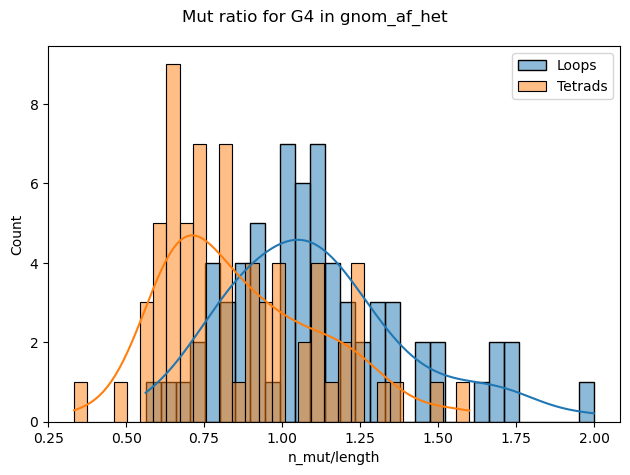

In [15]:
fig, axs = plt.subplots()
sns.histplot(df_loops_gnom_af_het['n_mut/length'], bins=30, kde=True, label='Loops')
sns.histplot(df_tetrads_gnom_af_het['n_mut/length'],bins=30, kde=True, label='Tetrads')
plt.suptitle('Mut ratio for G4 in gnom_af_het')
plt.legend()
plt.tight_layout()
fig.show()

# Normalising on MutSec

## Gnom analysis